## Sales Analysis

In [1]:
import os
import numpy as np
import pandas as pd
import plotly as pl
import seaborn as sns
import matplotlib.pyplot as plt

#### Merging 12 months of sales data into a single data file 

In [10]:
files = [file for file in os.listdir('./Sales_Data')]

all_months = pd.DataFrame()

for file in files:
    df = pd.read_csv('./Sales_Data/'+file)

In [12]:
all_months = pd.concat([all_months, df])
all_months.to_csv('all_months_data.csv',index=False)

In [2]:
january = pd.read_csv('Sales_January_2019.csv')
febraury = pd.read_csv('Sales_February_2019.csv')
march = pd.read_csv('Sales_March_2019.csv')
april = pd.read_csv('Sales_April_2019.csv')
may = pd.read_csv('Sales_May_2019.csv')
june = pd.read_csv('Sales_June_2019.csv')
july = pd.read_csv('Sales_July_2019.csv')
august = pd.read_csv('Sales_August_2019.csv')
september = pd.read_csv('Sales_September_2019.csv')
october = pd.read_csv('Sales_October_2019.csv')
november = pd.read_csv('Sales_November_2019.csv')
december = pd.read_csv('Sales_December_2019.csv') 

In [3]:
df = pd.concat([january, febraury, march, april, may, june, july, august, september, october, november, december])

In [4]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [5]:
df.shape

(186850, 6)

In [2]:
# OR, if you need to specify the format (less recommended, but sometimes necessary):
df = pd.read_csv('all_months.csv', parse_dates=['Order Date'], 
                 date_format=lambda x: pd.to_datetime(x, format='%Y-%m-%d %H:%M'))
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


### Clean Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [4]:
df.shape

(186850, 6)

In [6]:
df1 = df.dropna(axis=0, how='any')
df1.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [7]:
df1.shape

(186305, 6)

In [11]:
# comparing sizes of data frames
print("Old data frame length:", len(df),
      "\nNew data frame length:",
      len(df1), 
      "\nNumber of rows with at least 1 NA value: ",
      (len(df)-len(df1)))

Old data frame length: 186305 
New data frame length: 186305 
Number of rows with at least 1 NA value:  0


In [12]:
df1['Order ID'] = pd.to_numeric(df1['Order ID'], errors='coerce')
df1['Quantity Ordered'] = pd.to_numeric(df1['Quantity Ordered'], errors='coerce')
df1['Price Each'] = pd.to_numeric(df1['Price Each'], errors='coerce')

In [15]:
df1 = df1.dropna(axis=0, how='any')

In [16]:
df1.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

### Changing data type

In [20]:
df1['Order Date'] = pd.to_datetime(df1['Order Date'], format='%Y-%m-%d %H:%M-%S')

In [21]:
df1

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234.0,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235.0,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236.0,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237.0,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238.0,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186845,319666.0,Lightning Charging Cable,1.0,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016"
186846,319667.0,AA Batteries (4-pack),2.0,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001"
186847,319668.0,Vareebadd Phone,1.0,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101"
186848,319669.0,Wired Headphones,1.0,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001"


In [23]:
df1['Order ID'] = df1['Order ID'].astype('int')
df1['Quantity Ordered'] = df1['Quantity Ordered'].astype('int')

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  int64         
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 9.9+ MB


### Augment data with additional columns
#### Task 2: Add a new column

In [25]:
df1['Month'] = df1['Order Date'].dt.month

In [29]:
df1['Day'] = df1['Order Date'].dt.day

In [31]:
df1['Sales'] = df1['Quantity Ordered'] * df1['Price Each']
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,Day,Sales
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,2019,22,700.00
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,2019,28,14.95
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,2019,17,23.98
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,2019,5,149.99
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,2019,25,11.99


#### Task 3: Add a city column

In [56]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

df1['City'] = df1['Purchase Address'].apply(lambda x: get_city(x) + ' (' + get_state(x) + ')')

In [57]:
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,Day,Sales,City
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,2019,22,700.00,Boston (MA)
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,2019,28,14.95,Portland (OR)
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,2019,17,23.98,San Francisco (CA)
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,2019,5,149.99,Los Angeles (CA)
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,2019,25,11.99,Austin (TX)


In [42]:
df1['Month'] = df1['Month'].astype('int32')

In [33]:
df1.groupby('Month')['Sales'].sum()

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

#### Question 1: What was the best month for sales? How much earned that month?

In [43]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  int64         
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Month             185950 non-null  int32         
 7   Year              185950 non-null  int32         
 8   Day               185950 non-null  int32         
 9   Sales             185950 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(3), int64(2), object(2)
memory usage: 13.5+ MB


In [47]:
r = df1.groupby('Month').sum(numeric_only=True)
r

,Order ID,Quantity Ordered,Price Each,Year,Day,Sales
Month,,,,,,
1,1421630798,10903,1811768.38,19602505,155814,1822256.73
2,1871052592,13449,2188884.72,24177525,174408,2202022.42
3,2564810956,17005,2791207.83,30593907,241774,2807100.38
4,3387347100,20558,3367671.02,36905301,282960,3390670.24
5,3345871523,18667,3135125.13,33446754,264875,3152606.75
6,2932976072,15253,2562025.61,27365526,209880,2577802.26
7,3284139576,16072,2632539.56,28857567,227910,2647775.76
8,2899373917,13448,2230345.42,24149259,192315,2244467.88
9,2948726831,13109,2084992.09,23462799,180101,2097560.13


In [46]:
df1.groupby('Month')['Sales'].sum()

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

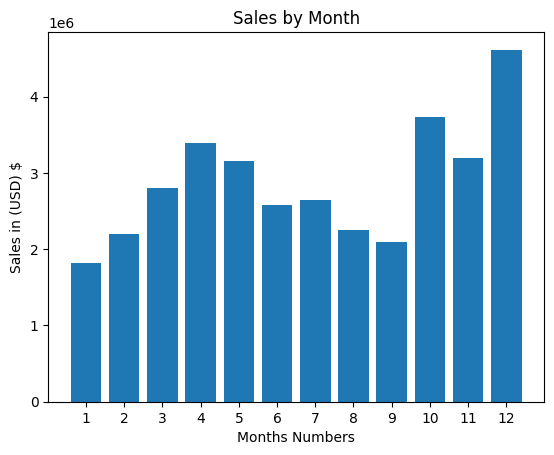

In [51]:
months = range(1, 13)

plt.bar(months, r['Sales'])
plt.xticks(months)
plt.title('Sales by Month')
plt.xlabel('Months Numbers')
plt.ylabel('Sales in (USD) $')
plt.show()

### Question #2: What city sold the most product? 

In [58]:
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,Day,Sales,City
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,2019,22,700.00,Boston (MA)
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,2019,28,14.95,Portland (OR)
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,2019,17,23.98,San Francisco (CA)
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,2019,5,149.99,Los Angeles (CA)
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,2019,25,11.99,Austin (TX)


In [65]:
df1.groupby('City').sum(numeric_only=True)

,Order ID,Quantity Ordered,Price Each,Month,Year,Day,Sales
City,,,,,,,
Atlanta (GA),3423838407,16602,2779908.20,104794,30044739,234837,2795498.58
Austin (TX),2280982185,11153,1809873.61,69829,19998197,156782,1819581.75
Boston (MA),4598265261,22528,3637409.77,141112,40246750,312376,3661642.01
Dallas (TX),3415643578,16730,2752627.82,104620,29921582,234435,2767975.40
Los Angeles (CA),6811084693,33289,5421435.23,208325,59772496,469607,5452570.80
New York City (NY),5736333884,27932,4635370.83,175741,50224654,392706,4664317.43
Portland (ME),563266345,2750,447189.25,17144,4956645,38288,449758.27
Portland (OR),2305594747,11303,1860558.22,70621,20210192,159233,1870732.34
San Francisco (CA),10304443952,50239,8211461.74,315520,90313920,702669,8262203.91


In [67]:
city = df1.groupby('City')['Sales'].sum(numeric_only=True)
city

City
Atlanta (GA)          2795498.58
Austin (TX)           1819581.75
Boston (MA)           3661642.01
Dallas (TX)           2767975.40
Los Angeles (CA)      5452570.80
New York City (NY)    4664317.43
Portland (ME)          449758.27
Portland (OR)         1870732.34
San Francisco (CA)    8262203.91
Seattle (WA)          2747755.48
Name: Sales, dtype: float64

In [ ]:
city_counts = df1['City'].value_counts() #Count the number of occurences of each city.
cities = city_counts.index
s = city_counts.values

plt.bar(cities, s)
# ... rest of your plotting code
plt.show()

In [86]:
city_counts = df1.groupby('City')['Sales'].sum()  # Aggregate/summarize

cities = city_counts.index  # Get the city names
s = city_counts.values      # Get the summed values

In [74]:
cities = df1['City'].unique()
cities

array([' Boston (MA)', ' Portland (OR)', ' San Francisco (CA)',
       ' Los Angeles (CA)', ' Austin (TX)', ' Atlanta (GA)',
       ' Seattle (WA)', ' New York City (NY)', ' Dallas (TX)',
       ' Portland (ME)'], dtype=object)

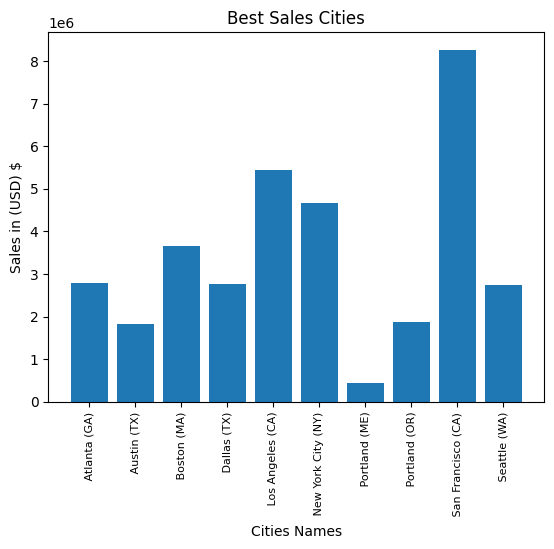

In [88]:
from matplotlib.pyplot import figure

plt.bar(cities, s)
plt.xticks(cities, rotation='vertical', size=8)
plt.title('Best Sales Cities')
plt.ylabel('Sales in (USD) $')
plt.xlabel('Cities Names')
plt.show()

### Question #3: What time should we display advertisements to maximize the likelihood of purchases?

#### Task 4: Creating hour & minute columns

In [89]:
df1['Hour'] = df1['Order Date'].dt.hour
df1['Minute'] = df1['Order Date'].dt.minute
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,Day,Sales,City,Hour,Minute
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,2019,22,700.00,Boston (MA),21,25
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,2019,28,14.95,Portland (OR),14,15
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,2019,17,23.98,San Francisco (CA),13,33
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,2019,5,149.99,Los Angeles (CA),20,33
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,2019,25,11.99,Austin (TX),11,59


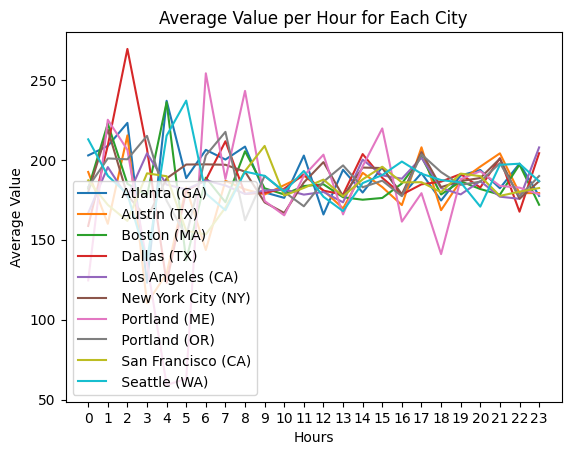

In [98]:
hours = range(24)

for city, data in df1.groupby('City'):
    hourly_city_data = data.groupby(data['Hour'])['Sales'].mean() #Replace with your column names.
    plt.plot(hourly_city_data.index, hourly_city_data.values, label=city)

plt.xlabel("Hours")
plt.ylabel("Average Value")
plt.title("Average Value per Hour for Each City")
plt.xticks(hours)
plt.legend()
plt.show()

In [110]:
df1.groupby(['Hour']).count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,Day,Sales,City,Minute
Hour,,,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


In [108]:
hours = [hour for hour, df1 in df1.groupby('Hour')]

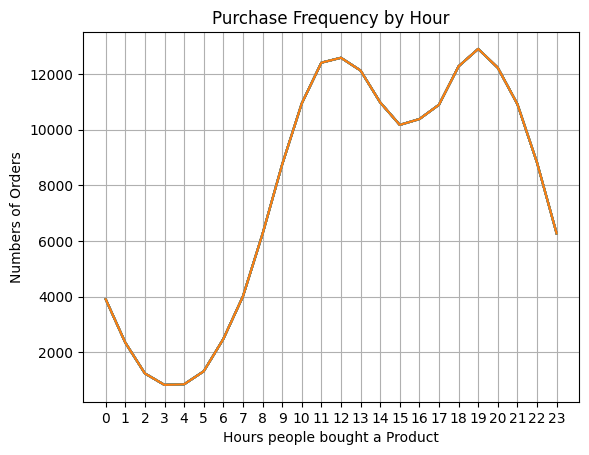

In [116]:
plt.plot(hours, df1.groupby(['Hour']).count())
plt.xticks(hours)
plt.title('Purchase Frequency by Hour')
plt.xlabel('Hours people bought a Product')
plt.ylabel('Numbers of Orders')
plt.grid()
plt.show()

### Question #4: What products are most often sold together? 

In [121]:
df_dup = df1[df1['Order ID'].duplicated(keep=False)]
df_dup.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,Day,Sales,City,Hour,Minute
41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,2019,7,11.95,Austin (TX),16,6
42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,2019,7,11.99,Austin (TX),16,6
57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,2019,2,150.00,Los Angeles (CA),8,25
58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,2019,2,11.52,Los Angeles (CA),8,25
133,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",1,2019,10,400.00,New York City (NY),11,19


In [129]:
df_dup['Grouped Product'] = df_dup.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df_dup.head()

/var/folders/rk/vsbmyjqx09n87m8t22syxyvr0000gn/T/ipykernel_17756/2186345155.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup['Grouped Product'] = df_dup.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,Day,Sales,City,Hour,Minute,Grouped Product
41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,2019,7,11.95,Austin (TX),16,6,"USB-C Charging Cable,Wired Headphones"
42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,2019,7,11.99,Austin (TX),16,6,"USB-C Charging Cable,Wired Headphones"
57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,2019,2,150.00,Los Angeles (CA),8,25,"Apple Airpods Headphones,AA Batteries (4-pack)"
58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,2019,2,11.52,Los Angeles (CA),8,25,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",1,2019,10,400.00,New York City (NY),11,19,"Vareebadd Phone,Wired Headphones"


In [131]:
df_dup = df_dup[['Order ID', 'Grouped Product']].drop_duplicates()
df_dup.head()

,Order ID,Grouped Product
41,141275,"USB-C Charging Cable,Wired Headphones"
57,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,"Vareebadd Phone,Wired Headphones"
153,141384,"Google Phone,USB-C Charging Cable"
220,141450,"Google Phone,Bose SoundSport Headphones"


In [142]:
import collections
from collections import Counter
from itertools import combinations

In [146]:
count = Counter()

for row in df_dup['Grouped Product']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [147]:
count = Counter()

for row in df_dup['Grouped Product']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 3)))

for key, value in count.most_common(10):
    print(key,value)

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5


### Question #5: What product sold the most? Why do you think it did?

In [148]:
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,Day,Sales,City,Hour,Minute
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,2019,22,700.00,Boston (MA),21,25
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,2019,28,14.95,Portland (OR),14,15
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,2019,17,23.98,San Francisco (CA),13,33
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,2019,5,149.99,Los Angeles (CA),20,33
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,2019,25,11.99,Austin (TX),11,59


In [152]:
df1.groupby('Product').sum(numeric_only=True)

,Order ID,Quantity Ordered,Price Each,Month,Year,Day,Sales,Hour,Minute
Product,,,,,,,,,
20in Monitor,950889651,4129,451068.99,29336,8279921,64237,454148.71,58764,122252
27in 4K Gaming Monitor,1442588628,6244,2429637.70,44440,12578371,97624,2435097.56,90916,184331
27in FHD Monitor,1724223743,7550,1125974.93,52558,15156636,117702,1132424.50,107540,219948
34in Ultrawide Monitor,1418985948,6199,2348718.19,43304,12479439,97726,2355558.01,89076,183480
AA Batteries (4-pack),4744173938,27635,79015.68,145558,41544963,325504,106118.40,298342,609039
AAA Batteries (4-pack),4764959472,31017,61716.59,146370,41674182,326283,92740.83,297332,612113
Apple Airpods Headphones,3579120098,15661,2332350.00,109477,31393435,244828,2349150.00,223304,455570
Bose SoundSport Headphones,3071496156,13457,1332366.75,94113,26903178,210543,1345565.43,192445,392603
Flatscreen TV,1110943207,4819,1440000.00,34224,9691201,75959,1445700.00,68815,142789


In [154]:
df1.groupby('Product')[['Quantity Ordered']].sum()

,Quantity Ordered
Product,
20in Monitor,4129
27in 4K Gaming Monitor,6244
27in FHD Monitor,7550
34in Ultrawide Monitor,6199
AA Batteries (4-pack),27635
AAA Batteries (4-pack),31017
Apple Airpods Headphones,15661
Bose SoundSport Headphones,13457
Flatscreen TV,4819


In [188]:
product_group = df1.groupby('Product').sum(numeric_only=True)
quantity_ordered = df1.groupby('Product')['Quantity Ordered'].sum(numeric_only=True)
product = [product for product in product_group]

In [199]:
# Assuming 'Product' is the column containing the product names:
product_labels = df1.groupby(['Product']).sum(numeric_only=True) # Select the correct column
quantity_ordered = df1.groupby('Quantity Ordered').sum(numeric_only=True)

In [201]:
# 1. Group by 'Product' and sum the 'Quantity Ordered' column:
product_quantity = df1.groupby('Product')['Quantity Ordered'].sum()

# 2. Extract the product labels and quantities:
product_labels = product_quantity.index  # Get the product names (x-axis)
quantity_ordered = product_quantity.values  # Get the summed quantities (y-axis)

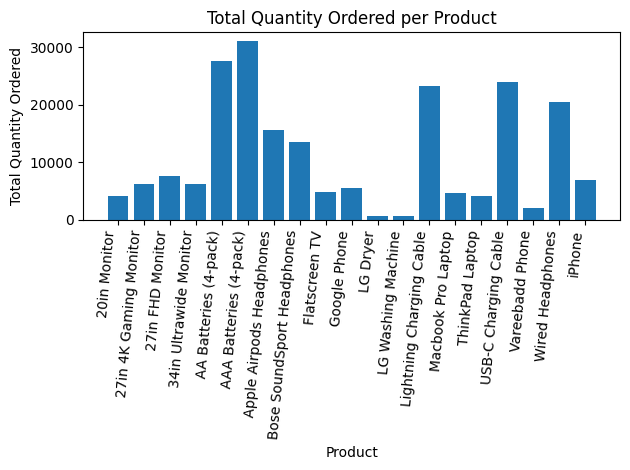

In [202]:
# 3. Now plot:
plt.bar(product_labels, quantity_ordered)
plt.xlabel("Product")
plt.ylabel("Total Quantity Ordered")
plt.title("Total Quantity Ordered per Product")
plt.xticks(rotation=85, ha='right') #Rotate x-axis labels for better readability.
plt.tight_layout() #Prevent labels from overlapping
plt.show()

In [204]:
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,Day,Sales,City,Hour,Minute
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,2019,22,700.00,Boston (MA),21,25
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,2019,28,14.95,Portland (OR),14,15
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,2019,17,23.98,San Francisco (CA),13,33
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,2019,5,149.99,Los Angeles (CA),20,33
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,2019,25,11.99,Austin (TX),11,59


In [206]:
prices = df1.groupby('Product')[['Price Each']].mean()
prices

,Price Each
Product,
20in Monitor,109.99
27in 4K Gaming Monitor,389.99
27in FHD Monitor,149.99
34in Ultrawide Monitor,379.99
AA Batteries (4-pack),3.84
AAA Batteries (4-pack),2.99
Apple Airpods Headphones,150.00
Bose SoundSport Headphones,99.99
Flatscreen TV,300.00


/var/folders/rk/vsbmyjqx09n87m8t22syxyvr0000gn/T/ipykernel_17756/1081135308.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(product_labels, rotation='vertical')


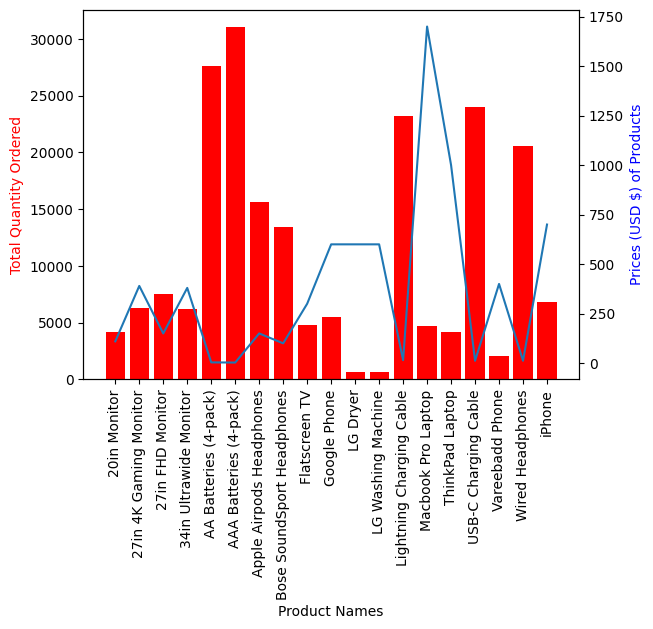

In [236]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.bar(product_labels, quantity_ordered, color='r')
ax2.plot(product_labels, prices)

ax1.set_xlabel('Product Names')
ax1.set_ylabel("Total Quantity Ordered", color='r')
ax1.set_xticklabels(product_labels, rotation='vertical')
ax2.set_ylabel("Prices (USD $) of Products", color='b')
plt.show()